## Projet Uber 

##Importing libraries

In [39]:
#Importing libraries 
print ('loading libraries...')
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from bokeh.plotting import figure, output_file, show
from tqdm import tqdm
print ('done')

loading libraries...
done


##Importing dataset 

In [24]:
#importing the dataset from the github url
url = 'https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/taxi-zone-lookup.csv'
data = pd.read_csv(url)
data.head(10)

,LocationID,Borough,Zone
0,1,EWR,Newark Airport
1,2,Queens,Jamaica Bay
2,3,Bronx,Allerton/Pelham Gardens
3,4,Manhattan,Alphabet City
4,5,Staten Island,Arden Heights
5,6,Staten Island,Arrochar/Fort Wadsworth
6,7,Queens,Astoria
7,8,Queens,Astoria Park
8,9,Queens,Auburndale
9,10,Queens,Baisley Park


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   LocationID  265 non-null    int64 
 1   Borough     265 non-null    object
 2   Zone        265 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.3+ KB


In [26]:
data.shape

(265, 3)

#import dataset 2 

In [27]:
#importing the second dataset with the uber courses of April 2014
url_2 = 'https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-apr14.csv'
data_2 = pd.read_csv(url_2)
data_2.head(10)
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [28]:
data_2.shape

(564516, 4)

In [29]:
data_2.head(5)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [36]:
X = data_2[['Lat','Lon']]

In [37]:
#Scaling the data 
sc = StandardScaler()

100%|██████████| 10/10 [02:12<00:00, 13.23s/it]


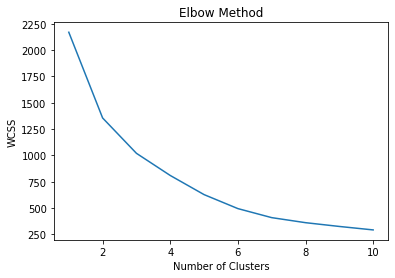

In [40]:
#Searching optimum clusters 

wcss =  []
for i in tqdm(range (1,11)):
    kmeans = KMeans(n_clusters= i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
